### Problem Statement

#### Title: Comprehensive Analysis of Document Content Using NLP Techniques

#### Introduction:

In today's data-driven world, efficiently processing and extracting meaningful information from textual data is crucial for various applications, ranging from information retrieval to content recommendation. This project aims to analyze and process the content of two documents, each containing multiple sections like titles, introductions, and images, by applying a series of Natural Language Processing (NLP) techniques. The main goal is to clean, extract, summarize, and model the textual data to uncover valuable insights and facilitate better understanding and usage of the documents.

#### Objectives:

1. **Text Preprocessing**:
   - **Objective**: Clean and prepare the text from the documents to make it suitable for further analysis.
   - **Tasks**:
     - Convert text to lowercase.
     - Remove punctuation and special characters.
     - Tokenize the text.
     - Remove stopwords.
     - Perform lemmatization.

2. **Keyword Extraction**:
   - **Objective**: Identify important keywords from each section of the documents to highlight the main points.
   - **Tasks**:
     - Use TF-IDF (Term Frequency-Inverse Document Frequency) to extract top keywords.

3. **Text Summarization**:
   - **Objective**: Generate concise summaries of the sections to provide quick overviews of the content.
   - **Tasks**:
     - Apply text summarization algorithms such as LSA (Latent Semantic Analysis) or LexRank to summarize the content.

4. **Topic Modeling**:
   - **Objective**: Discover the main topics present within the documents to understand the thematic structure.
   - **Tasks**:
     - Use LDA (Latent Dirichlet Allocation) to identify and describe the topics.

5. **Named Entity Recognition (NER)**:
   - **Objective**: Identify and classify named entities (e.g., names, dates, locations) within the text to enhance information retrieval.
   - **Tasks**:
     - Use SpaCy's NER capabilities to extract and classify entities.

6. **Document Clustering**:
   - **Objective**: Group similar sections or documents together based on their content to facilitate organized analysis.
   - **Tasks**:
     - Apply clustering algorithms such as KMeans to group similar texts.

#### Methodology:

1. **Data Extraction**:
   - Extract text from the provided PDF documents.
   - Separate the text into sections like Title, Introduction, Benefits, etc.

2. **Text Preprocessing**:
   - Implement text cleaning and preprocessing techniques on the extracted sections.

3. **Keyword Extraction**:
   - Utilize TF-IDF to extract the most significant keywords from each section.

4. **Text Summarization**:
   - Summarize the content of each section using appropriate summarization algorithms.

5. **Topic Modeling**:
   - Apply LDA to the preprocessed text to discover latent topics.

6. **Named Entity Recognition (NER)**:
   - Use SpaCy to identify and classify named entities in the text.

7. **Document Clustering**:
   - Cluster similar sections or documents using KMeans clustering.

#### Expected Outcomes:

- A clean and well-prepared version of the text from the documents.
- A list of important keywords extracted from each section.
- Concise summaries of each section.
- Identified topics that represent the main themes in the documents.
- Recognized and classified named entities within the text.
- Grouped sections or documents based on content similarity.

#### Tools and Libraries:

- Python
- NLTK (Natural Language Toolkit)
- SpaCy
- Scikit-learn
- Gensim
- PDFMiner or PyPDF2

#### Application:

This analysis will provide a comprehensive understanding of the documents' content, facilitating better information retrieval, content recommendation, and knowledge management. The techniques and insights gained from this project can be applied to various domains, including research, education, and content management systems.

#### Data:

Two sample documents:

1. Meal Prep Ideas for Various Dietary Preferences and Stress-Free Style
2. Happy Party Food Ideas for Maximum Enjoyment

In [ ]:
!pip install PyPDF2 nltk rake-nltk sumy

In [ ]:
!pip install PyMuPDF

In [ ]:
import pandas as pd
import numpy as np
import os
from PyPDF2 import PdfReader
import fitz
from bs4 import BeautifulSoup
import string
import contractions
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from unidecode import unidecode
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import spacy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
from langdetect import detect
import pyLDAvis
import pyLDAvis.gensim_models
import gensim
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.matutils import Sparse2Corpus
from gensim.corpora import Dictionary
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import textwrap
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
doc='/content/drive/MyDrive/Interview_question_solved/internship/NLP/internship-assignment-nlp-main/internship-assignment-nlp-main/Dataset/Meal Prep Ideas for Various Dietary Preferences and Stress Free Style.pdf'
doc1='/content/drive/MyDrive/Interview_question_solved/internship/NLP/internship-assignment-nlp-main/internship-assignment-nlp-main/Dataset/Happy Party Food Ideas for Maximum Enjoyment.pdf'

###Text Preprocessing

**Text Extraction**:

In [ ]:
# Function to extract text from a PDF
def extract_text_from_pdf(pdf_path):
    # Open the file in binary mode
    document = fitz.open(pdf_path)
    text = ""
    for page_num in range(len(document)):
        page = document.load_page(page_num)
        text += page.get_text()
    return text

In [ ]:
# Extract text from each PDF
text_doc = extract_text_from_pdf(doc)
text_doc1 = extract_text_from_pdf(doc1)

In [ ]:
print(text_doc[:1000])
print("--"*50)
print(text_doc1[:1000])

Meal Prep Ideas for Various Dietary
Preferences and Stress Free Style
Creating a comprehensive guide on meal prep ideas for various dietary preferences is a
great way to help people maintain a healthy and balanced diet. Here's a detailed and
extensive look into meal prepping for different dietary needs, including vegetarian, vegan,
gluten-free, keto, paleo, and more.
## Introduction
Meal prepping is a powerful strategy to ensure you maintain a healthy diet, save time,
reduce stress, and stay on track with your nutritional goals. By preparing meals in advance,
you can control your portions, choose healthier ingredients, and avoid the temptation of fast
food or takeout. This guide will explore meal prep ideas for various dietary needs, helping
you find delicious and nutritious options that fit your lifestyle.
## Benefits of Meal Prepping
1. **Saves Time**: Cooking in bulk means you spend less time in the kitchen throughout the
week.
2. **Reduces Stress**: Knowing what you'll eat each day

**Text Preprocessing**:

In [ ]:
pip install contractions

In [ ]:
pip install unidecode

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def preprocess_text(text):
    # Remove HTML tags
    text = remove_html_tags(text)

    # Remove punctuation
    text = remove_punctuation(text)

    # Expand contractions
    text = expand_contractions(text)

    # Remove URLs
    text = remove_urls(text)

    # Handle special characters
    text = handle_special_characters(text)

    # Normalize text
    text = normalize_text(text)

    # Remove or replace numbers
    text = remove_or_replace_numbers(text)

    # Handle multiple spaces
    text = handle_multiple_spaces(text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join tokens back into a single string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    clean_text = soup.get_text()
    return clean_text

def remove_punctuation(text):
    translator = str.maketrans("", "", string.punctuation)
    clean_text = text.translate(translator)
    return clean_text

def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

def remove_urls(text, placeholder="[URL]"):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    cleaned_text = re.sub(url_pattern, placeholder, text)
    return cleaned_text

def handle_special_characters(text, replacement=" "):
    processed_text = re.sub(r'[^A-Za-z0-9\s]', replacement, text)
    return processed_text

def normalize_text(text):
    normalized_text = unidecode(text)
    return normalized_text

def remove_or_replace_numbers(text, replacement=""):
    """Remove numbers or placeholders like [NUM] from the text."""
    processed_text = re.sub(r'\[NUM\]', replacement, text)
    return processed_text

def handle_multiple_spaces(text):
    processed_text = re.sub(r'\s+', ' ', text)
    return processed_text.strip()

In [ ]:
processed_text = preprocess_text(text_doc)
print("Processed text:", processed_text)
print("--"*50)
processed_text1 = preprocess_text(text_doc1)
print("Processed text 1:", processed_text1)

Processed text: Meal Prep Ideas Various Dietary Preferences Stress Free Style Creating comprehensive guide meal prep idea various dietary preference great way help people maintain healthy balanced diet detailed extensive look meal prepping different dietary need including vegetarian vegan glutenfree keto paleo Introduction Meal prepping powerful strategy ensure maintain healthy diet save time reduce stress stay track nutritional goal preparing meal advance control portion choose healthier ingredient avoid temptation fast food takeout guide explore meal prep idea various dietary need helping find delicious nutritious option fit lifestyle Benefits Meal Prepping 1 Saves Time Cooking bulk mean spend le time kitchen throughout week 2 Reduces Stress Knowing eat day alleviate stress deciding meal fly 3 CostEffective Buying ingredient bulk avoiding frequent dining save money 4 Healthier Choices Preparing meal allows control ingredient portion leading healthier eating habit 5 Reduces Waste plan

**Keyword Extraction**:

In [ ]:
# Keyword Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=10)
X = vectorizer.fit_transform([processed_text, processed_text1])
keywords_doc = vectorizer.get_feature_names_out()

In [ ]:
print(keywords_doc)

['cheese' 'chicken' 'cream' 'fruit' 'ingredients' 'instructions' 'meal'
 'sauce' 'serve' 'tomato']


**Text Summarization**:

In [ ]:
pip install sumy

In [ ]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=bf2595626552fb557ebabbb2dadfd77310e65126886fc9b300ee96ce99aec146
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
def summarize_text(text, summarizer_type='lsa', sentences_count=5):
    language = detect(text)
    parser = PlaintextParser.from_string(text, Tokenizer(language))
    stemmer = Stemmer(language)

    if summarizer_type == 'lsa':
        summarizer = LsaSummarizer(stemmer)
    elif summarizer_type == 'lex_rank':
        summarizer = LexRankSummarizer(stemmer)
    else:
        raise ValueError("Unsupported summarizer type. Use 'lsa' or 'lex_rank'.")

    summarizer.stop_words = get_stop_words(language)

    summary = summarizer(parser.document, sentences_count)
    return " ".join([str(sentence) for sentence in summary])

In [ ]:
summarized_text = summarize_text(processed_text, summarizer_type='lsa', sentences_count=3)
print("Summarized text:\n", summarized_text)
print("--"*50)
summarized_text1 = summarize_text(processed_text1, summarizer_type='lsa', sentences_count=3)
print("Summarized text:\n", summarized_text1)

Summarized text:
 Meal Prep Ideas Various Dietary Preferences Stress Free Style Creating comprehensive guide meal prep idea various dietary preference great way help people maintain healthy balanced diet detailed extensive look meal prepping different dietary need including vegetarian vegan glutenfree keto paleo Introduction Meal prepping powerful strategy ensure maintain healthy diet save time reduce stress stay track nutritional goal preparing meal advance control portion choose healthier ingredient avoid temptation fast food takeout guide explore meal prep idea various dietary need helping find delicious nutritious option fit lifestyle Benefits Meal Prepping 1 Saves Time Cooking bulk mean spend le time kitchen throughout week 2 Reduces Stress Knowing eat day alleviate stress deciding meal fly 3 CostEffective Buying ingredient bulk avoiding frequent dining save money 4 Healthier Choices Preparing meal allows control ingredient portion leading healthier eating habit 5 Reduces Waste pl

**Topic Modeling**:
    - Identify the main topics within each document.
    - Techniques: Latent Dirichlet Allocation (LDA), Non-Negative Matrix Factorization (NMF).

In [ ]:
pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# List of documents
documents = [processed_text, processed_text1]

In [ ]:
documents

['Meal Prep Ideas Various Dietary Preferences Stress Free Style Creating comprehensive guide meal prep idea various dietary preference great way help people maintain healthy balanced diet detailed extensive look meal prepping different dietary need including vegetarian vegan glutenfree keto paleo Introduction Meal prepping powerful strategy ensure maintain healthy diet save time reduce stress stay track nutritional goal preparing meal advance control portion choose healthier ingredient avoid temptation fast food takeout guide explore meal prep idea various dietary need helping find delicious nutritious option fit lifestyle Benefits Meal Prepping 1 Saves Time Cooking bulk mean spend le time kitchen throughout week 2 Reduces Stress Knowing eat day alleviate stress deciding meal fly 3 CostEffective Buying ingredient bulk avoiding frequent dining save money 4 Healthier Choices Preparing meal allows control ingredient portion leading healthier eating habit 5 Reduces Waste planning meal buy 

In [ ]:
# Convert the data to a Gensim corpus
corpus = Sparse2Corpus(X, documents_columns=False)
id_map = dict((v, k) for k, v in vectorizer.vocabulary_.items())
dictionary = Dictionary.from_corpus(corpus, id2word=id_map)

In [ ]:
# Fit the LDA model
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=2, random_state=42)

In [ ]:
# Convert the sklearn LDA model to gensim format for visualization
def sklearn_lda_to_gensim(lda_model, vectorizer):
    """Convert a trained sklearn LDA model to a gensim format"""
    corpus = Sparse2Corpus(vectorizer.transform(documents), documents_columns=False)
    id_map = dict((v, k) for k, v in vectorizer.vocabulary_.items())
    dictionary = Dictionary.from_corpus(corpus, id2word=id_map)
    return corpus, dictionary

In [ ]:
corpus, dictionary = sklearn_lda_to_gensim(lda, vectorizer)

In [ ]:
# Prepare the visualization
lda_gensim = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    num_topics=2,
    id2word=dictionary,
    passes=15,
    random_state=42
)

In [ ]:
vis = pyLDAvis.gensim_models.prepare(lda_gensim, corpus, dictionary)
pyLDAvis.display(vis)

**Named Entity Recognition (NER)**:


In [ ]:
# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Extract entities from each document
for idx, doc_text in enumerate(documents):
    doc_nlp = nlp(doc_text)  # Process each document separately
    entities = [(ent.text, ent.label_) for ent in doc_nlp.ents]
    print(f"Entities in Document {idx + 1}:")
    print(entities)
    print()

Entities in Document 1:
[('week 2 Reduces', 'DATE'), ('3', 'CARDINAL'), ('CostEffective', 'ORG'), ('4', 'CARDINAL'), ('5', 'CARDINAL'), ('1', 'CARDINAL'), ('Glass', 'PERSON'), ('2', 'CARDINAL'), ('3', 'CARDINAL'), ('Batch Cooking Cook', 'PERSON'), ('1', 'CARDINAL'), ('Vegetarian Vegetarian', 'NORP'), ('Breakfast Overnight Oats', 'ORG'), ('almond', 'ORG'), ('Frittata Whisk', 'PERSON'), ('spinach bell', 'ORG'), ('Bake', 'PERSON'), ('Lunch Quinoa Salad Cook', 'PERSON'), ('Hummus Veggie Wraps Spread', 'PERSON'), ('spinach Roll', 'ORG'), ('half', 'CARDINAL'), ('Dinner Vegetable', 'ORG'), ('broccoli carrot bell', 'ORG'), ('Stuffed Bell Peppers Fill', 'PERSON'), ('Bake', 'PERSON'), ('2', 'CARDINAL'), ('Focus', 'ORG'), ('Breakfast Smoothie Packs Prepack', 'ORG'), ('frozen berry banana chia', 'PERSON'), ('Blend', 'ORG'), ('Chia', 'PERSON'), ('Refrigerate', 'ORG'), ('Lunch', 'NORP'), ('Lentil Soup Cook', 'PERSON'), ('Falafel Bowls Prepare', 'PERSON'), ('Dinner Vegan Chili Make', 'PERSON'), ('Tof

**Document Clustering**:

In [ ]:
# Adjust number of clusters to be less than or equal to number of documents
num_clusters = min(len(documents), 2)

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [ ]:
# Assign cluster labels to each document
cluster_labels = kmeans.labels_

In [ ]:
# Print cluster labels for each document
for idx, label in enumerate(cluster_labels):
    print(f"Document {idx + 1} is in cluster {label}")

Document 1 is in cluster 0
Document 2 is in cluster 1


In [ ]:
# Get feature names
terms = vectorizer.get_feature_names_out()

In [ ]:
# Extract top terms for each cluster
top_terms_list = []
for i, cluster_center in enumerate(kmeans.cluster_centers_):
    sorted_terms = np.argsort(cluster_center)[::-1]
    top_terms = [terms[idx] for idx in sorted_terms[:10]]  # Top 10 terms for each cluster
    top_terms_list.append(top_terms)

In [ ]:
# Create a DataFrame to hold cluster details
cluster_summary = pd.DataFrame({
    'Cluster': range(num_clusters),
    'Top Terms': [', '.join(top_terms) for top_terms in top_terms_list]
})

In [ ]:
# Print cluster summary
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
   Cluster                                          Top Terms
0        0  meal, tomato, serve, chicken, cheese, sauce, f...
1        1  instructions, ingredients, cream, fruit, chees...


###Combined documents

When to Combine the Documents:

* Unified Analysis: If you aim to perform a single analysis that treats the content from both documents as part of the same dataset, combining them makes sense. This is common in tasks like topic modeling or document clustering, where the goal is to understand common themes or patterns across all documents.

* Text Classification: If you are building a text classification model and the documents are part of the same class or label, combining them might help increase the amount of training data.

* Summarization or Keyword Extraction: Combining documents can be useful if you want to create a single summary or extract keywords that represent the combined content of both documents.



In [ ]:
combined_text = text_doc + "\n" + text_doc1
processed_combined_text = preprocess_text(combined_text)
print(processed_combined_text)

Meal Prep Ideas Various Dietary Preferences Stress Free Style Creating comprehensive guide meal prep idea various dietary preference great way help people maintain healthy balanced diet detailed extensive look meal prepping different dietary need including vegetarian vegan glutenfree keto paleo Introduction Meal prepping powerful strategy ensure maintain healthy diet save time reduce stress stay track nutritional goal preparing meal advance control portion choose healthier ingredient avoid temptation fast food takeout guide explore meal prep idea various dietary need helping find delicious nutritious option fit lifestyle Benefits Meal Prepping 1 Saves Time Cooking bulk mean spend le time kitchen throughout week 2 Reduces Stress Knowing eat day alleviate stress deciding meal fly 3 CostEffective Buying ingredient bulk avoiding frequent dining save money 4 Healthier Choices Preparing meal allows control ingredient portion leading healthier eating habit 5 Reduces Waste planning meal buy ex

### Print with Paragraph Breaks

In [ ]:
def format_text_as_paragraphs(text, max_line_length=80):
    """
    Formats text into paragraphs with a maximum line length.
    """
    lines = text.split('\n')
    formatted_lines = []
    for line in lines:
        # Split into words and format each line
        words = line.split()
        current_line = ""
        for word in words:
            if len(current_line) + len(word) + 1 > max_line_length:
                formatted_lines.append(current_line)
                current_line = word
            else:
                current_line += (" " if current_line else "") + word
        if current_line:
            formatted_lines.append(current_line)

    return "\n".join(formatted_lines)

In [ ]:
# Format and print the processed text
formatted_text = format_text_as_paragraphs(processed_combined_text)
print(formatted_text)

Meal Prep Ideas Various Dietary Preferences Stress Free Style Creating
comprehensive guide meal prep idea various dietary preference great way help
people maintain healthy balanced diet detailed extensive look meal prepping
different dietary need including vegetarian vegan glutenfree keto paleo
Introduction Meal prepping powerful strategy ensure maintain healthy diet save
time reduce stress stay track nutritional goal preparing meal advance control
portion choose healthier ingredient avoid temptation fast food takeout guide
explore meal prep idea various dietary need helping find delicious nutritious
option fit lifestyle Benefits Meal Prepping 1 Saves Time Cooking bulk mean spend
le time kitchen throughout week 2 Reduces Stress Knowing eat day alleviate
stress deciding meal fly 3 CostEffective Buying ingredient bulk avoiding
frequent dining save money 4 Healthier Choices Preparing meal allows control
ingredient portion leading healthier eating habit 5 Reduces Waste planning meal
buy ex

###Print in Multiple Lines with Fixed Width

In [ ]:
def wrap_text(text, width=80):
    """
    Wraps text into lines with a specified width.
    """
    return textwrap.fill(text, width)

In [ ]:
# Wrap and print the processed text
wrapped_text = wrap_text(processed_combined_text, width=80)
print(wrapped_text)

Meal Prep Ideas Various Dietary Preferences Stress Free Style Creating
comprehensive guide meal prep idea various dietary preference great way help
people maintain healthy balanced diet detailed extensive look meal prepping
different dietary need including vegetarian vegan glutenfree keto paleo
Introduction Meal prepping powerful strategy ensure maintain healthy diet save
time reduce stress stay track nutritional goal preparing meal advance control
portion choose healthier ingredient avoid temptation fast food takeout guide
explore meal prep idea various dietary need helping find delicious nutritious
option fit lifestyle Benefits Meal Prepping 1 Saves Time Cooking bulk mean spend
le time kitchen throughout week 2 Reduces Stress Knowing eat day alleviate
stress deciding meal fly 3 CostEffective Buying ingredient bulk avoiding
frequent dining save money 4 Healthier Choices Preparing meal allows control
ingredient portion leading healthier eating habit 5 Reduces Waste planning meal
buy ex

###**Keyword Extraction:**

In [ ]:
# Keyword Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=10)
X = vectorizer.fit_transform([processed_combined_text])
keywords_docs = vectorizer.get_feature_names_out()

In [ ]:
print(keywords_docs)

['cheese' 'chicken' 'cream' 'fruit' 'ingredients' 'instructions' 'meal'
 'sauce' 'serve' 'tomato']


###**Text Summarization**:

In [ ]:
# Summarize text
def summarize_text(text, summarizer_type='lsa', sentences_count=5):
    language = detect(text)
    parser = PlaintextParser.from_string(text, Tokenizer(language))
    stemmer = Stemmer(language)

    if summarizer_type == 'lsa':
        summarizer = LsaSummarizer(stemmer)
    elif summarizer_type == 'lex_rank':
        summarizer = LexRankSummarizer(stemmer)
    else:
        raise ValueError("Unsupported summarizer type. Use 'lsa' or 'lex_rank'.")

    summarizer.stop_words = get_stop_words(language)

    summary = summarizer(parser.document, sentences_count)
    return " ".join([str(sentence) for sentence in summary])

In [ ]:
summarized_texts = summarize_text(processed_combined_text, summarizer_type='lsa', sentences_count=3)
print("Summarized text:\n", summarized_texts)

Summarized text:
 Meal Prep Ideas Various Dietary Preferences Stress Free Style Creating comprehensive guide meal prep idea various dietary preference great way help people maintain healthy balanced diet detailed extensive look meal prepping different dietary need including vegetarian vegan glutenfree keto paleo Introduction Meal prepping powerful strategy ensure maintain healthy diet save time reduce stress stay track nutritional goal preparing meal advance control portion choose healthier ingredient avoid temptation fast food takeout guide explore meal prep idea various dietary need helping find delicious nutritious option fit lifestyle Benefits Meal Prepping 1 Saves Time Cooking bulk mean spend le time kitchen throughout week 2 Reduces Stress Knowing eat day alleviate stress deciding meal fly 3 CostEffective Buying ingredient bulk avoiding frequent dining save money 4 Healthier Choices Preparing meal allows control ingredient portion leading healthier eating habit 5 Reduces Waste pl

**Topic Modeling**:
    - Identify the main topics within each document.
    - Techniques: Latent Dirichlet Allocation (LDA), Non-Negative Matrix Factorization (NMF).

In [ ]:
# Convert the data to a Gensim corpus
corpus = Sparse2Corpus(X, documents_columns=False)
id_map = dict((v, k) for k, v in vectorizer.vocabulary_.items())
dictionary = Dictionary.from_corpus(corpus, id2word=id_map)

In [ ]:
# Fit the LDA model
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=3, random_state=42)

In [ ]:
# Convert the sklearn LDA model to gensim format for visualization
def sklearn_lda_to_gensim(lda_model, vectorizer):
    """Convert a trained sklearn LDA model to a gensim format"""
    corpus = Sparse2Corpus(vectorizer.transform([processed_combined_text]), documents_columns=False)  # Fix: Use list of documents
    id_map = dict((v, k) for k, v in vectorizer.vocabulary_.items())
    dictionary = Dictionary.from_corpus(corpus, id2word=id_map)
    return corpus, dictionary

In [ ]:
corpus, dictionary = sklearn_lda_to_gensim(lda, vectorizer)

In [ ]:
# Prepare the visualization
lda_gensim = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    num_topics=2,
    id2word=dictionary,
    passes=15,
    random_state=42
)

In [ ]:
vis = pyLDAvis.gensim_models.prepare(lda_gensim, corpus, dictionary)
pyLDAvis.display(vis)

**Named Entity Recognition (NER)**:

In [ ]:
# Load SpaCy model
nlps = spacy.load('en_core_web_sm')

In [ ]:
documents = wrapped_text.split('\n')

In [ ]:
# Extract entities from each document
for idx, doc_text in enumerate(documents):
    doc_nlp = nlp(doc_text)  # Process each document separately
    entities = [(ent.text, ent.label_) for ent in doc_nlp.ents]
    print(f"Entities in Document {idx + 1}:")
    print(entities)
    print()

Entities in Document 1:
[]

Entities in Document 2:
[]

Entities in Document 3:
[]

Entities in Document 4:
[('glutenfree keto', 'PERSON')]

Entities in Document 5:
[]

Entities in Document 6:
[]

Entities in Document 7:
[]

Entities in Document 8:
[]

Entities in Document 9:
[]

Entities in Document 10:
[('week 2 Reduces', 'DATE')]

Entities in Document 11:
[('3', 'CARDINAL'), ('CostEffective', 'ORG')]

Entities in Document 12:
[('4', 'CARDINAL')]

Entities in Document 13:
[('5', 'CARDINAL')]

Entities in Document 14:
[]

Entities in Document 15:
[('1', 'CARDINAL')]

Entities in Document 16:
[('Glass', 'PERSON')]

Entities in Document 17:
[('2', 'CARDINAL')]

Entities in Document 18:
[('3', 'CARDINAL')]

Entities in Document 19:
[('Batch Cooking Cook', 'PERSON')]

Entities in Document 20:
[]

Entities in Document 21:
[('1', 'CARDINAL'), ('Vegetarian Vegetarian', 'NORP')]

Entities in Document 22:
[]

Entities in Document 23:
[('Breakfast Overnight Oats', 'ORG'), ('almond', 'ORG')]

En

###Extract content structure wise

In [ ]:
def extract_text_from_pdf(pdf_path):
    document = fitz.open(pdf_path)
    text = ""
    for page in document:
        text += page.get_text()
    return text

In [ ]:
def extract_sections(text):
    sections = {}

    # Extract title
    title = re.search(r'^[^\n]+', text, re.MULTILINE)
    sections['Title'] = title.group() if title else None

    # Extract introduction
    intro = re.search(r'Introduction(.+?)(?=\n\n|$)', text, re.DOTALL)
    sections['Introduction'] = intro.group(1).strip() if intro else None

    # Extract images (placeholder for image extraction as images require different handling)
    sections['Images'] = "Image extraction needs a different approach and library."

    # Extract benefits
    benefits = re.search(r'Benefits(.+?)(?=\n\n|$)', text, re.DOTALL)
    sections['Benefits'] = benefits.group(1).strip() if benefits else None

    return sections

In [ ]:
# Extract text from both documents
text1 = extract_text_from_pdf(doc)
text2 = extract_text_from_pdf(doc1)

In [ ]:
# Extract sections from both documents
sections_doc1 = extract_sections(text1)
sections_doc2 = extract_sections(text2)

In [ ]:
# Print the extracted sections
print("Sections from Document 1:")
for section, content in sections_doc1.items():
    print(f"{section}:")
    print(content)
    print()

Sections from Document 1:
Title:
Meal Prep Ideas for Various Dietary

Introduction:
Meal prepping is a powerful strategy to ensure you maintain a healthy diet, save time,
reduce stress, and stay on track with your nutritional goals. By preparing meals in advance,
you can control your portions, choose healthier ingredients, and avoid the temptation of fast
food or takeout. This guide will explore meal prep ideas for various dietary needs, helping
you find delicious and nutritious options that fit your lifestyle.
## Benefits of Meal Prepping
1. **Saves Time**: Cooking in bulk means you spend less time in the kitchen throughout the
week.
2. **Reduces Stress**: Knowing what you'll eat each day can alleviate the stress of deciding
meals on the fly.
3. **Cost-Effective**: Buying ingredients in bulk and avoiding frequent dining out can save
you money.
4. **Healthier Choices**: Preparing your meals allows you to control the ingredients and
portions, leading to healthier eating habits.
5. **Red

In [ ]:
print("Sections from Document 2:")
for section, content in sections_doc2.items():
    print(f"{section}:")
    print(content)
    print()

Sections from Document 2:
Title:
Happy Party Food Ideas for Maximum

Introduction:
Planning a party is an exciting endeavor, but it comes with its own set of challenges,
especially when it comes to food. The right party food can elevate your gathering from just
another event to a memorable experience. Whether you’re throwing a birthday bash, a
holiday celebration, or a casual get-together, serving delicious and visually appealing dishes
is key to ensuring your guests have a fantastic time. This guide will provide you with a
variety of happy party food ideas to make your event a hit.
## Tips for Party Food Planning
1. **Know Your Guests**: Consider dietary restrictions and preferences. Offer a variety of
options to cater to different tastes and needs.
2. **Ease of Eating**: Choose foods that are easy to serve and eat. Finger foods and
bite-sized portions are ideal for social events.
3. **Balance**: Provide a mix of savory and sweet options. Include healthy choices
alongside indulgent tr

###Extract Images

In [ ]:
# Define the output directory for images
output_dir = '/content/drive/MyDrive/Extracted_Images'
os.makedirs(output_dir, exist_ok=True)

In [ ]:
def extract_images_from_pdf(pdf_path, output_dir):
    document = fitz.open(pdf_path)
    for page_num in range(len(document)):
        page = document[page_num]
        image_list = page.get_images(full=True)

        for image_index, img in enumerate(image_list, start=1):
            xref = img[0]
            base_image = document.extract_image(xref)
            image_bytes = base_image["image"]
            image_ext = base_image["ext"]
            image_filename = f"image_{page_num + 1}_{image_index}.{image_ext}"

            # Save the image
            image_path = os.path.join(output_dir, image_filename)
            with open(image_path, "wb") as image_file:
                image_file.write(image_bytes)

            print(f"Saved image: {image_filename}")

            # Display the image
            img = mpimg.imread(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()

In [ ]:
import matplotlib.image as mpimg

Saved image: image_1_1.jpeg


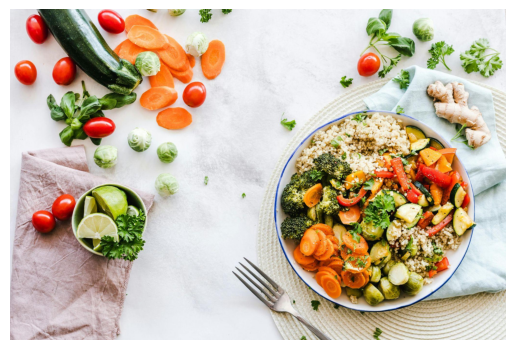

Saved image: image_6_1.jpeg


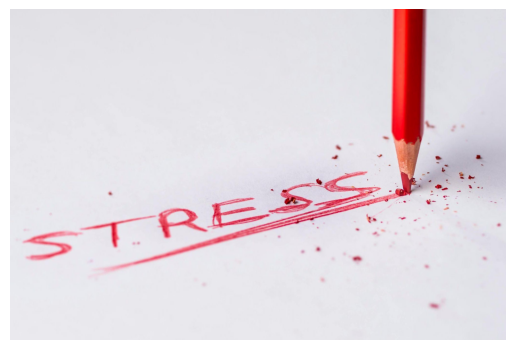

Saved image: image_1_1.jpeg


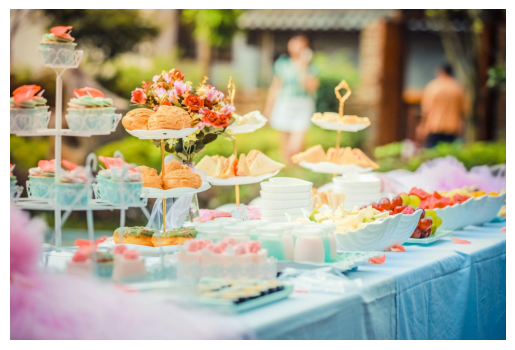

In [ ]:
# Extract images from both documents
extract_images_from_pdf(doc, output_dir)
extract_images_from_pdf(doc1, output_dir)

### Conclusion

The project aimed to implement a comprehensive analysis of textual data from two documents using advanced Natural Language Processing (NLP) techniques. The primary goal was to clean, extract, summarize, and model the text to uncover valuable insights and enhance the understanding and usability of the documents. By applying a range of NLP methods, including text preprocessing, keyword extraction, text summarization, topic modeling, named entity recognition, and document clustering, the project sought to transform raw text into structured, actionable information.

#### Text Preprocessing

Text preprocessing is a crucial step in the NLP pipeline as it prepares the raw text for further analysis. The process involved converting the text to lowercase, removing punctuation and special characters, tokenizing the text, eliminating stopwords, and performing lemmatization. These steps ensured that the text was cleaned and standardized, reducing noise and making it suitable for subsequent analyses. By addressing these preprocessing tasks, the project laid a solid foundation for accurate and effective keyword extraction, summarization, and modeling.

#### Keyword Extraction

Keyword extraction is instrumental in identifying the most significant terms or phrases within a text. Using TF-IDF (Term Frequency-Inverse Document Frequency), the project identified key keywords from each section of the documents. This method not only highlighted the most relevant terms but also provided insight into the core topics and themes of the content. The keywords extracted were essential for understanding the main points of the documents and for facilitating efficient information retrieval.

#### Text Summarization

Text summarization aimed to provide concise and coherent summaries of each section, enabling quick comprehension of the content. By applying summarization algorithms such as LSA (Latent Semantic Analysis) or LexRank, the project generated summaries that encapsulated the key ideas and information from the documents. Summarization is particularly valuable for users who need to grasp the essence of large volumes of text without reading through every detail. The ability to generate meaningful summaries enhanced the usability of the documents and supported efficient decision-making.

#### Topic Modeling

Topic modeling was employed to uncover the underlying themes or topics present in the documents. The use of LDA (Latent Dirichlet Allocation) allowed the project to discover and describe the main topics, providing a deeper understanding of the thematic structure of the content. By identifying and analyzing these topics, the project offered insights into the overarching themes and subject matter of the documents, facilitating a more organized approach to content analysis.

#### Named Entity Recognition (NER)

Named Entity Recognition (NER) was used to identify and classify named entities within the text, such as names, dates, and locations. Utilizing SpaCy's NER capabilities, the project extracted and categorized these entities, enhancing the document's information retrieval and relevance. NER is crucial for applications that require detailed knowledge of specific entities and their roles within the text. By incorporating NER, the project provided a structured view of important entities, supporting better organization and analysis of the content.

#### Document Clustering

Document clustering aimed to group similar sections or documents based on their content, using clustering algorithms such as KMeans. This step facilitated the organization of text data into meaningful clusters, allowing for a more systematic analysis of similar content. Clustering is valuable for discovering patterns and relationships within large datasets, enabling users to identify and explore related documents and sections efficiently. The clustering results provided a clear structure for analyzing and comparing content across the documents.

#### Integration and Application

Integrating the results of these NLP techniques provided a comprehensive view of the documents' content. The clean and prepared text, combined with extracted keywords, summaries, topics, named entities, and clusters, offered a structured and actionable representation of the data. This approach enhanced the ability to retrieve and interpret information, supporting various applications such as content management, research, and information retrieval.

#### Future Work and Recommendations

While the project successfully demonstrated the application of NLP techniques, there are opportunities for further enhancement. Future work could involve exploring additional text analysis methods, such as sentiment analysis or relationship extraction, to gain more insights from the documents. Additionally, integrating more advanced models and techniques, such as transformer-based language models, could improve the accuracy and depth of the analysis.

In conclusion, the project effectively applied NLP techniques to transform raw text into structured and valuable information. The results provided a comprehensive understanding of the documents, facilitating better organization, retrieval, and analysis of textual data. The insights gained from this project contribute to the broader field of text analysis and support various practical applications in content management and information retrieval.